<a href="https://colab.research.google.com/github/fisterfolks/NTI/blob/master/LAB2videopotoki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import auth
auth.authenticate_user()


In [2]:
#downloading gcsfuse
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

#Mounting Raw folder
!mkdir raw
!gcsfuse -o nonempty mit-fivek-dataset-raw /content/raw 

#Mounting tiff folder
!mkdir tiff
!gcsfuse -o nonempty mit-fivek-dataset-expert-c /content/tiff 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0   8480      0 --:--:-- --:--:-- --:--:--  8480
OK
64 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 64 not upgraded.
Need to get 4,274 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.28.1_amd64.deb ...
Unpacking gcsfuse (0.28.1) ...
Setting up gcsfuse (0.28.1) ...
Using mount point: /content/raw
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.
Using mount point: /content/tiff
Opening GCS connection...
Opening bucket...
Mounting 

In [3]:
import glob
tif_images = glob.glob('/content/tiff/*')
raw_images = glob.glob('/content/raw/*')
print(len(tif_images))
print(len(raw_images))

4971
4971


In [4]:
print(tif_images[:10])
print(raw_images[:10])


['/content/tiff/a0001-jmac_DSC1459.tif', '/content/tiff/a0002-dgw_005.tif', '/content/tiff/a0003-NKIM_MG_8178.tif', '/content/tiff/a0004-jmac_MG_1384.tif', '/content/tiff/a0005-jn_2007_05_10__564.tif', '/content/tiff/a0006-IMG_2787.tif', '/content/tiff/a0007-IMG_2480.tif', '/content/tiff/a0008-WP_CRW_3959.tif', '/content/tiff/a0009-kme_372.tif', '/content/tiff/a0010-jmac_MG_4807.tif']
['/content/raw/a0001-jmac_DSC1459.dng', '/content/raw/a0002-dgw_005.dng', '/content/raw/a0003-NKIM_MG_8178.dng', '/content/raw/a0004-jmac_MG_1384.dng', '/content/raw/a0005-jn_2007_05_10__564.dng', '/content/raw/a0006-IMG_2787.dng', '/content/raw/a0007-IMG_2480.dng', '/content/raw/a0008-WP_CRW_3959.dng', '/content/raw/a0009-kme_372.dng', '/content/raw/a0010-jmac_MG_4807.dng']


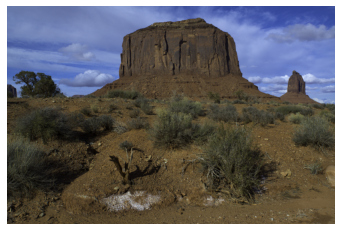

In [5]:
# Let's view an image
import matplotlib.pyplot as plt
image = plt.imread(tif_images[0])
plt.axis(False)
plt.imshow(image);


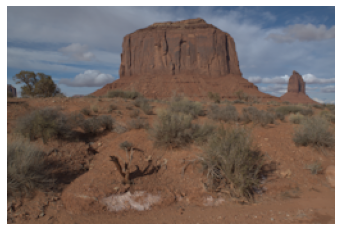

In [6]:
image = plt.imread(raw_images[0])
plt.axis(False)
plt.imshow(image);

In [0]:
X = raw_images
y = tif_images

In [0]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:3000,step:100}

In [9]:
from sklearn.model_selection import train_test_split

#Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=0)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [0]:
import numpy as np

In [0]:
def show_images(images):
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(1, n_images, n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [12]:
!sudo apt-get install -y exiftool

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libposix-strptime-perl libsombok3
  libunicode-linebreak-perl
Suggested packages:
  libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl
  libposix-strptime-perl libsombok3 libunicode-linebreak-perl
0 upgraded, 6 newly installed, 0 to remove and 64 not upgraded.
Need to get 3,395 kB of archives.
After this operation, 20.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libarchive-zip-perl all 1.60-1ubuntu0.1 [84.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libimage-exiftool-perl all 10.80-1 [3,147 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe a

In [13]:
!pip install rawpy
!pip install pyexifinfo

     |████████████████████████████████| 1.6MB 4.4MB/s 
  Created wheel for pyexifinfo: filename=pyexifinfo-0.4.0-cp36-none-any.whl size=2814 sha256=1efdd89e6f036d0f3fbcc58e1dc9b0b4745efa995cf10c537dad16896342e2ac
  Stored in directory: /root/.cache/pip/wheels/77/fd/eb/682b5c016ad223d39013f8321030e7bfd9a2274850e5142f5e
Successfully built pyexifinfo


In [0]:
import subprocess
import os
import json
from skimage.util import img_as_float
from skimage import io
import rawpy
from skimage.measure import compare_psnr, compare_ssim
import json
import pyexifinfo as p

In [0]:
from scipy.ndimage.filters import convolve
def white_balancing(matrix, _wb, _pattern):
    _wb.pop()
    _wb = np.array(_wb)
    _wb /= _wb[1]
    _wb_dict = dict(zip('RGB', _wb))
    _pattern = str(_pattern, 'utf-8')
    for channel, (y, x) in zip(_pattern, [(0, 0), (0, 1), (1, 0), (1, 1)]):
        matrix[y::2, x::2] *= _wb_dict[channel]

    return np.clip(matrix, 0, 2**14 - 1)


def demosaicing(matrix, _pattern):
    _pattern = str(_pattern, 'utf-8')
    channels = dict((channel, np.zeros(matrix.shape)) for channel in 'RGB')
    for channel, (y, x) in zip(_pattern, [(0, 0), (0, 1), (1, 0), (1, 1)]):
        channels[channel][y::2, x::2] = 1

    R_m, G_m, B_m = tuple(channels[c].astype(bool) for c in 'RGB')

    H_G = np.array(
        [[0, 1, 0],
         [1, 4, 1],
         [0, 1, 0]]) / 4

    H_RB = np.array(
        [[1, 2, 1],
         [2, 4, 2],
         [1, 2, 1]]) / 4

    Rs = convolve(matrix * R_m, H_RB)
    Gs = convolve(matrix * G_m, H_G)
    Bs = convolve(matrix * B_m, H_RB)

    del R_m, G_m, B_m, H_RB, H_G
    return np.dstack([Rs, Gs, Bs])

In [16]:
print(raw_images[-12])

/content/raw/a4989-IMG_2346.dng


In [0]:
from tensorflow.keras.utils import Sequence
path_to_dng = '/content/raw/'
path_to_tiff = '/content/tiff/'


In [18]:
import tensorflow as tf
print("TF version:", tf.__version__)
# Check for GPU availability
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "Not Available")


TF version: 2.2.0
GPU Available


In [0]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input, Add, Activation, AveragePooling2D, ZeroPadding2D, Conv2DTranspose, concatenate
# Glorot uniform initializer, also called Xavier uniform initializer.
from tensorflow.keras.initializers import glorot_uniform

In [0]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
  
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [0]:
def get_unet(pretrained_model = "", input_img= (256, 256, 1), n_filters = 16, batchnorm = True):
    # Contracting Path
    if os.path.exists(pretrained_model):
        model = load_model(pretrained_model, custom_objects={'PSNR': PSNR})
    else:
        inputs = Input(input_img)
        c1 = conv2d_block(inputs, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
        p1 = MaxPooling2D((2, 2))(c1)
        
        c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
        p2 = MaxPooling2D((2, 2))(c2)
        
        c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
        p3 = MaxPooling2D((2, 2))(c3)
        
        c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
        p4 = MaxPooling2D((2, 2))(c4)
        
        c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
        
        # Expansive Path
        u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
        u6 = concatenate([u6, c4])
        c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
        
        u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
        u7 = concatenate([u7, c3])
        c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
        
        u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
        u8 = concatenate([u8, c2])
        c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
        
        u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
        u9 = concatenate([u9, c1])
        c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
        
        outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
        model = Model(inputs=inputs, outputs=[outputs])
    return model

In [22]:
#model_dir = ""
#model = get_unet(pretrained_model=None, input_img=(None, None,1))
#model.summary()


TypeError: ignored

In [0]:
class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size=32, n_channels=1, window_size=512,
                 n_classes=3, shuffle=True, debug=False):
        'Initialization'
        self.batch_size = batch_size
        self.window_size=window_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        print('aaaaaaa')
        self.debug = debug

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*int(self.batch_size*4):(index+1)*int(self.batch_size*4)]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        #print(list_IDs_temp)
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def process_dng(self, dng_name):
        metadata = str(subprocess.check_output(
            ["exiftool", dng_name, "-Orientation", "-BitsPerSample", "-DefaultCropOrigin", "-DefaultCropSize"]))
        # orientation  - #data[0]
        # bits per sample - #data[1]
        # crop origin = #data[2]
        # crop size = #data[3]
        raw = rawpy.imread(dng_name)
        dng = raw.raw_image_visible  # matrix bayer
        print(metadata)
        metadata = str(metadata).split('\\n')
        print(metadata)
        metadata = metadata[0:(len(metadata) - 1)]
        data = []
        for row in metadata:
            data.append(row.split(': ')[1])
        print(data)
        bits = int(data[1])
        h = int(data[2].split()[0])
        w = int(data[2].split()[1])

        # x_crop = int(data[2].split()[0].split('.')[0])
        # y_crop = int(data[2].split()[1].split('.')[0])

        h_len = int(data[3].split()[0])
        w_len = int(data[3].split()[1])
        # W_im = int(data[3].split()[0])
        # H_im = int(data[3].split()[1])
        # dng = dng[w:w+w_len, h:h+h_len]
        # H_im = int(H_im / 8) * 8
        # W_im = int(W_im / 8) * 8

        # rotating

        if data[0] == "Rotate 90 CW":
            dng = np.rot90(dng, 3)
            h, w = w, h
            # W_im, H_im = H_im, W_im
        elif data[0] == "Rotate 270 CW":
            dng = np.rot90(dng)
            # W_im, H_im = H_im, W_im
            h, w = w, h
        elif data[0] == "Rotate 180":
            dng = np.rot90(dng, 2)

        # cropping

        dng = dng[w:w + w_len, h:h + h_len]
        # normalization
        image = dng / (2 ** 14 - 1)
        print('aaaaaaaaaaaaaaaaaaaa')
        return image


    
    def convert_image_to_array(self, ID):
        imagename = path_to_dng + ID# + ".dng"

        dng = self.process_dng(imagename)

        imagename = path_to_tif + ID.replace('.dng', '.tif')
        print(imagename)
        tif = cv2.imread(imagename) #tif = cv2.resize(cv2.imread(imagename), (dng.shape[1], dng.shape[0]))

        tif = tif[:dng.shape[0], :dng.shape[1], :] / 255

        #self.compare(dng, tif)

        return dng, tif

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, self.window_size, self.window_size), dtype=float)
        Y = np.empty((self.batch_size, self.window_size, self.window_size, self.n_classes), dtype=float)
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            try:
                dng, tif = self.convert_image_to_array(ID)
                if self.debug:
                    print(ID)
                    print(dng.shape)
                    print(tif.shape)

                min_H = min(len(dng), len(tif))
                min_W = min(len(dng[0]), len(tif[0]))

                #1 batch = 1 crop
                rand_H = np.random.randint(len(dng) - self.window_size - 10)
                rand_W = np.random.randint(len(dng[0]) - self.window_size - 10)

                # Store sample
                #random crops from image
                X[i,] = (dng[(rand_H):(rand_H + self.window_size), (rand_W):(rand_W + self.window_size)])
                Y[i,] = (tif[(rand_H):(rand_H + self.window_size), (rand_W):(rand_W + self.window_size), :])

                #self.compare(X[i], Y[i])

                if i == (self.batch_size - 1):
                    break
            except Exception:
                i -= 1
                continue

        if self.debug:
            print(X.shape)
        X = np.expand_dims(X, -1)
        if self.debug:
            print(X.shape)
        #Y = np.asarray(Y)
        return X, Y


In [0]:
def create_dataset_IDs(im_count=7000):
    dirs_dng = os.listdir(folder_dng)
    x_data = []

    for image in dirs_dng:
        imagename = os.path.splitext(image)[0]
        x_data.append(folder_dng + imagename)

    print("Dataset created")
    return x_data

In [0]:
def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return (10.0 * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - y_true), axis=-1)))) / 2.303

In [0]:
params = {'batch_size': 16,
          'n_classes': 3,
          'n_channels': 1,
          'window_size' : 256,
          'shuffle': True,
          'debug': False}


In [0]:
#first attempt - 100epochs mse + 1000 pictures(patches)
#training_generator = DataGenerator(raw_images[:1000], **params)

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
#model.compile(optimizer=tf.optimizers.Adam(), metrics=[PSNR], loss='mean_squared_error') # or tf.keras.losses.MSE
#model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_dir, save_best_only=True)
#history = model.fit(x=training_generator, epochs=100)#, callbacks=[model_checkpoint_callback])

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#model.save('/content/drive/My Drive/model_first_100')

In [0]:
def save_model(nameofvolume, model, folder, suffix=None):
    modeldir = os.path.join(f"{folder}")
    model_path = modeldir + nameofvolume + ".h5" # save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [36]:
#second attempt to mae loss
training_generator2 = DataGenerator(raw_images[:1000], **params)


aaaaaaa


In [37]:
model2 = get_unet(input_img=(None, None,1))
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, None, None, 1 160         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, None, None, 1 64          conv2d_20[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, None, None, 1 0           batch_normalization_19[0][0]     
____________________________________________________________________________________________

In [38]:
model2.compile(optimizer='sgd', metrics=[PSNR], loss=tf.keras.losses.MeanAbsoluteError()) # or tf.keras.losses.MSE
#model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_dir, save_best_only=True)
history2 = model2.fit(x=training_generator2, epochs=100)#, callbacks=[model_checkpoint_callback])

Epoch 1/100
62/62 [==============================] - 106s 2s/step - loss: 0.4810 - PSNR: 6.3587
Epoch 2/100
62/62 [==============================] - 105s 2s/step - loss: 0.4427 - PSNR: 7.0783
Epoch 3/100
62/62 [==============================] - 99s 2s/step - loss: 0.4058 - PSNR: 7.8348
Epoch 4/100
62/62 [==============================] - 105s 2s/step - loss: 0.3709 - PSNR: 8.6165
Epoch 5/100
62/62 [==============================] - 105s 2s/step - loss: 0.3385 - PSNR: 9.4112
Epoch 6/100
62/62 [==============================] - 105s 2s/step - loss: 0.3088 - PSNR: 10.2078
Epoch 7/100
62/62 [==============================] - 99s 2s/step - loss: 0.2820 - PSNR: 10.9969
Epoch 8/100
62/62 [==============================] - 106s 2s/step - loss: 0.2579 - PSNR: 11.7712
Epoch 9/100
62/62 [==============================] - 99s 2s/step - loss: 0.2365 - PSNR: 12.5251
Epoch 10/100
62/62 [==============================] - 106s 2s/step - loss: 0.2174 - PSNR: 13.2549
Epoch 11/100
62/62 [=================

In [39]:

save_model("100epochmae", model2, "/content/drive/My Drive/")

Saving model to: /content/drive/My Drive/100epochmae.h5...


'/content/drive/My Drive/100epochmae.h5'

In [0]:
#a = DataGenerator(raw_images)

In [0]:
#image = a.process_dng(raw_images[-2])


In [0]:
#model = load_model('/content/drive/My Drive/100epochmse.h5', custom_objects={'PSNR':PSNR})
